In [1]:
java_code_smells = read.csv("java_code_smells.csv", header = TRUE)
kotlin_code_smells = read.csv("kotlin_code_smells.csv", header = TRUE)

In [2]:
set.seed(37)
df_java_projects_ran <- java_code_smells[sample(nrow(java_code_smells)),]
df_kotlin_projects_ran <- kotlin_code_smells[sample(nrow(kotlin_code_smells)),]

Dividing into training and test data.

In [3]:
df_java_projects_training <- df_java_projects_ran[1:400,]
df_kotlin_projects_training <- df_kotlin_projects_ran[1:400,]

In [4]:
rownames(df_java_projects_training) <- NULL
rownames(df_kotlin_projects_training) <- NULL

In [5]:
df_java_projects_training

Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
zzz40500/GsonFormat,0,57,10,67,1486,43,7069,98,11,2771
Curzibn/Luban,0,4,2,6,854,74,1180,189,11,8792
JakeWharton/ThreeTenABP,0,0,0,0,1241,8,139,56,9,2502
arimorty/floatingsearchview,2,28,4,34,1099,69,4311,295,12,3068
abel533/MyBatis-Spring-Boot,0,0,0,0,1072,89,1132,49,2,2285
AbrahamCaiJin/CommonUtilLibrary,0,183,35,218,576,7,23741,156,3,2077
wdullaer/MaterialDateTimePicker,1,82,11,94,1422,42,9598,442,34,3769
DreaminginCodeZH/Douya,36,882,145,1063,1028,11,59133,1283,1,4034
ybq/Android-SpinKit,0,22,3,25,980,29,2397,90,13,5476
dbeaver/dbeaver,81,3114,334,3529,1131,755,368544,10821,86,6674


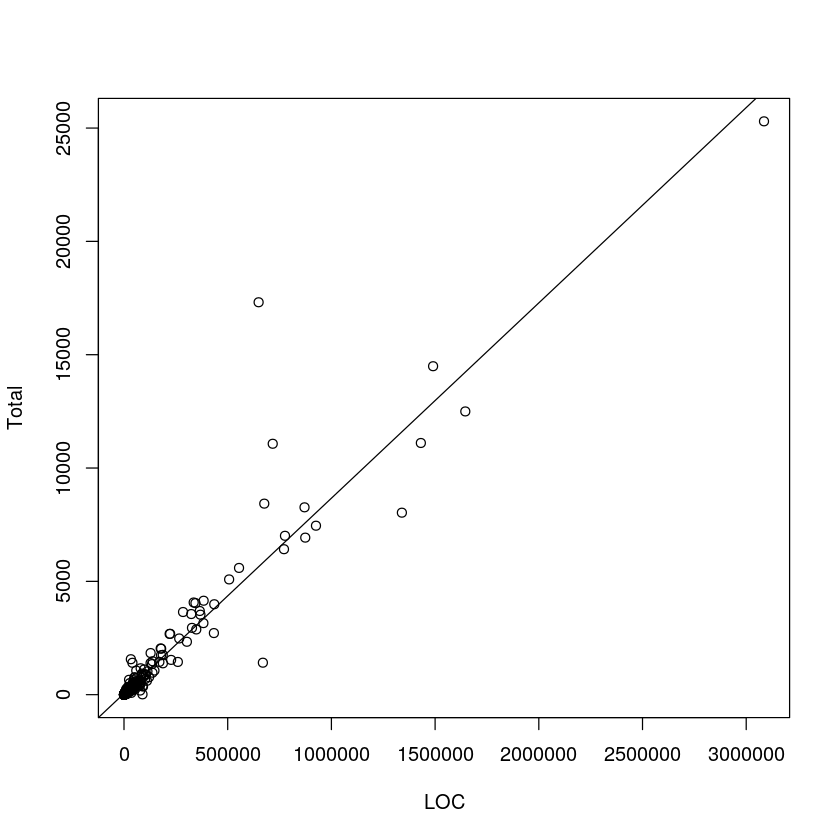

In [6]:
fit <- lm(Total ~ LOC, data=df_java_projects_training)
plot(df_java_projects_training$LOC,df_java_projects_training$Total,
xlab="LOC",
ylab="Total")
abline(fit)

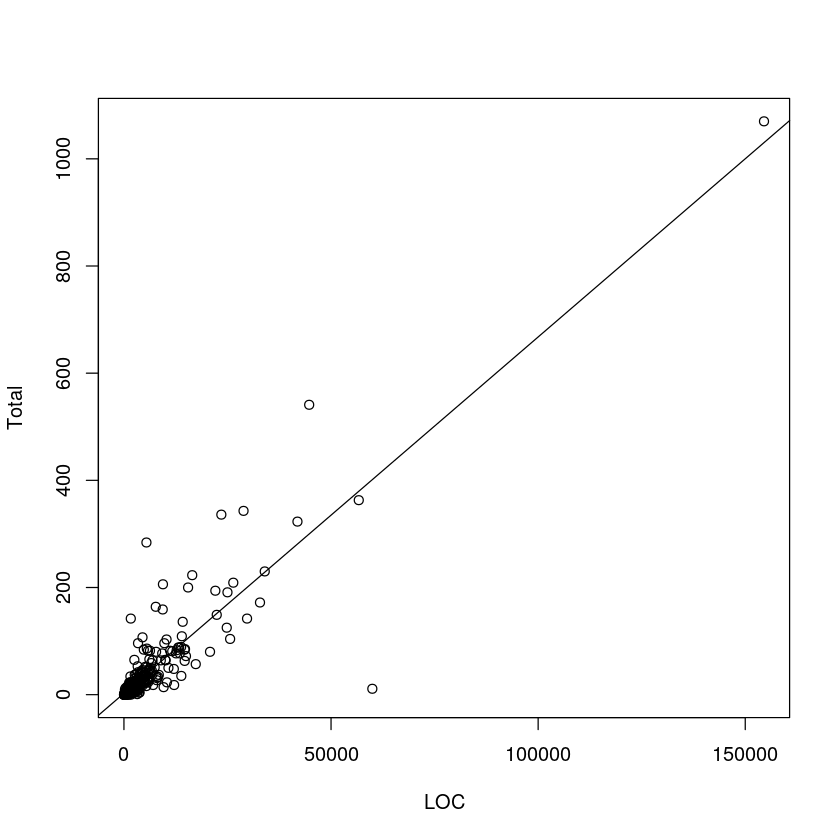

In [7]:
fit <- lm(Total ~ LOC, data=df_kotlin_projects_training)
plot(df_kotlin_projects_training$LOC,df_kotlin_projects_training$Total,
xlab="LOC",
ylab="Total")
abline(fit)

In [13]:
short_java_projects <- subset(df_java_projects_training, LOC < 5000)

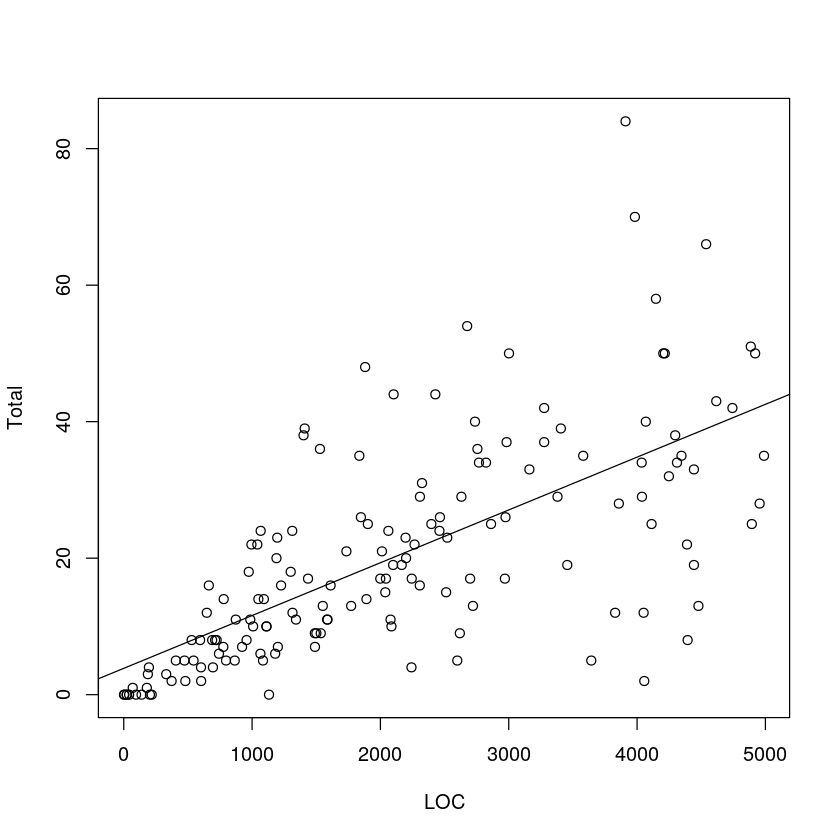

In [14]:
fit <- lm(Total ~ LOC, data=short_java_projects)
plot(short_java_projects$LOC,short_java_projects$Total,
xlab="LOC",
ylab="Total")
abline(fit)

In [15]:
short_kotlin_projects <- subset(df_kotlin_projects_training, LOC < 5000)

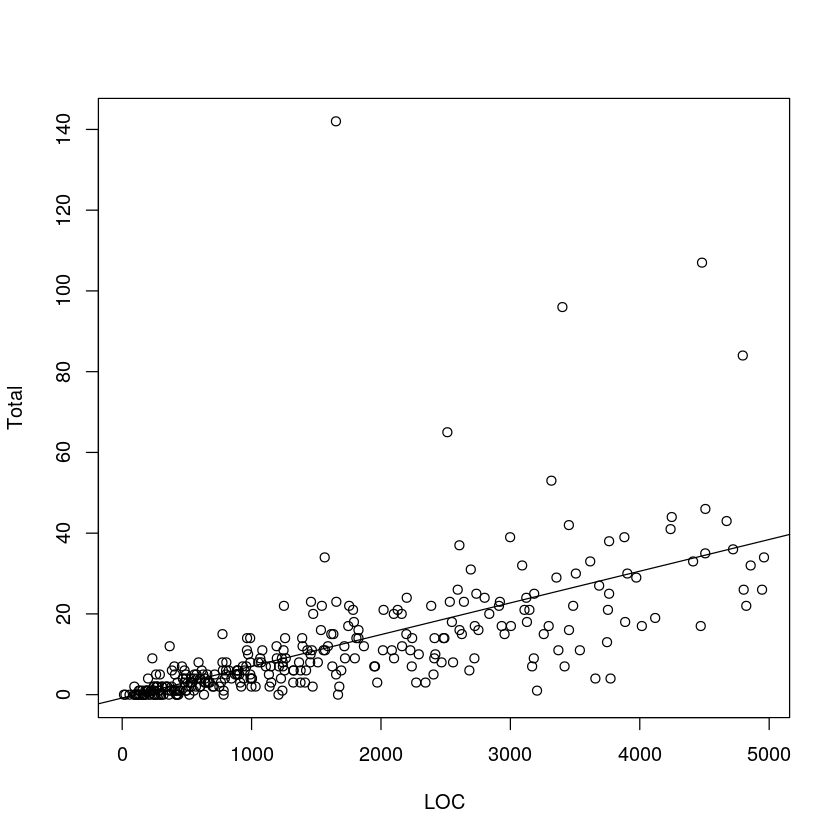

In [16]:
fit <- lm(Total ~ LOC, data=short_kotlin_projects)
plot(short_kotlin_projects$LOC,short_kotlin_projects$Total,
xlab="LOC",
ylab="Total")
abline(fit)

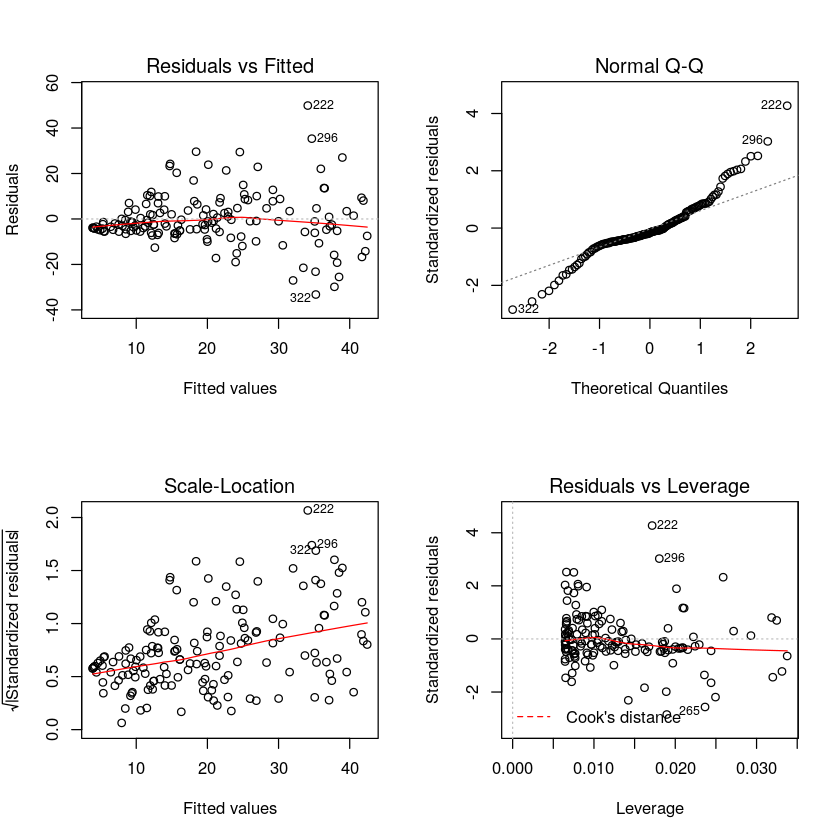

In [18]:
fit <- lm(Total ~ LOC, data=short_java_projects)
par(mfrow=c(2,2))
plot(fit)

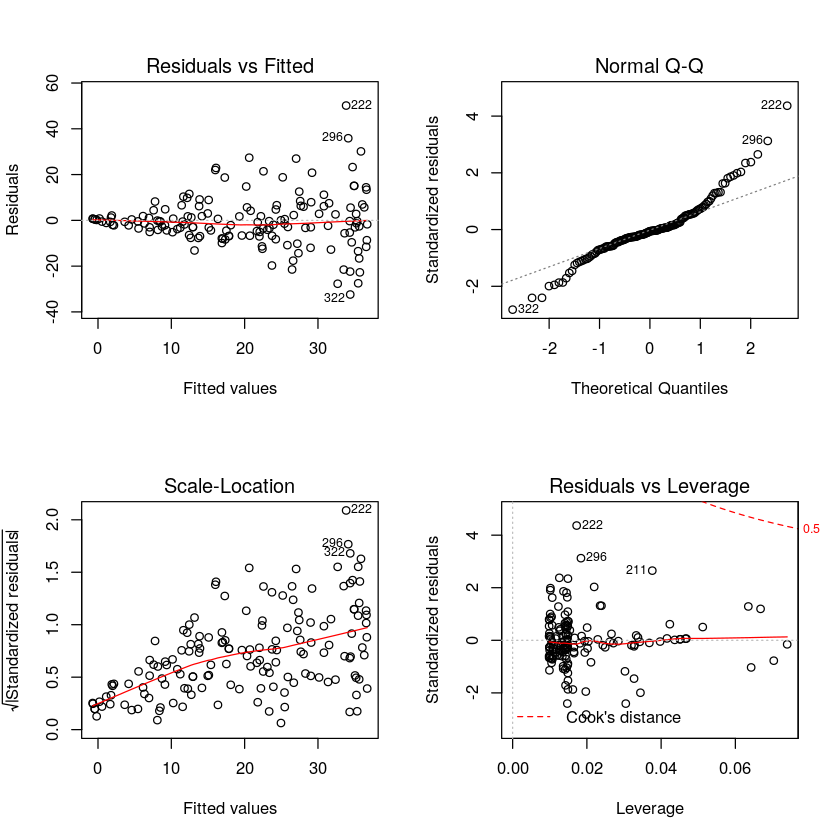

In [19]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=short_java_projects)
par(mfrow=c(2,2))
plot(polynomial_fit)

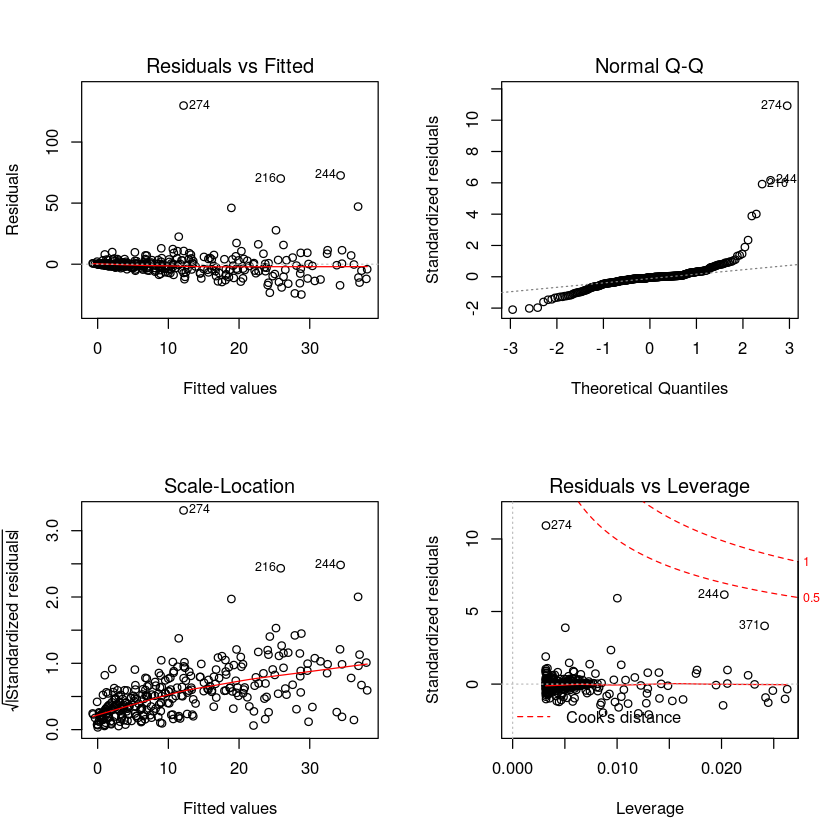

In [24]:
fit <- lm(Total ~ LOC, data=short_kotlin_projects)
par(mfrow=c(2,2))
plot(fit)

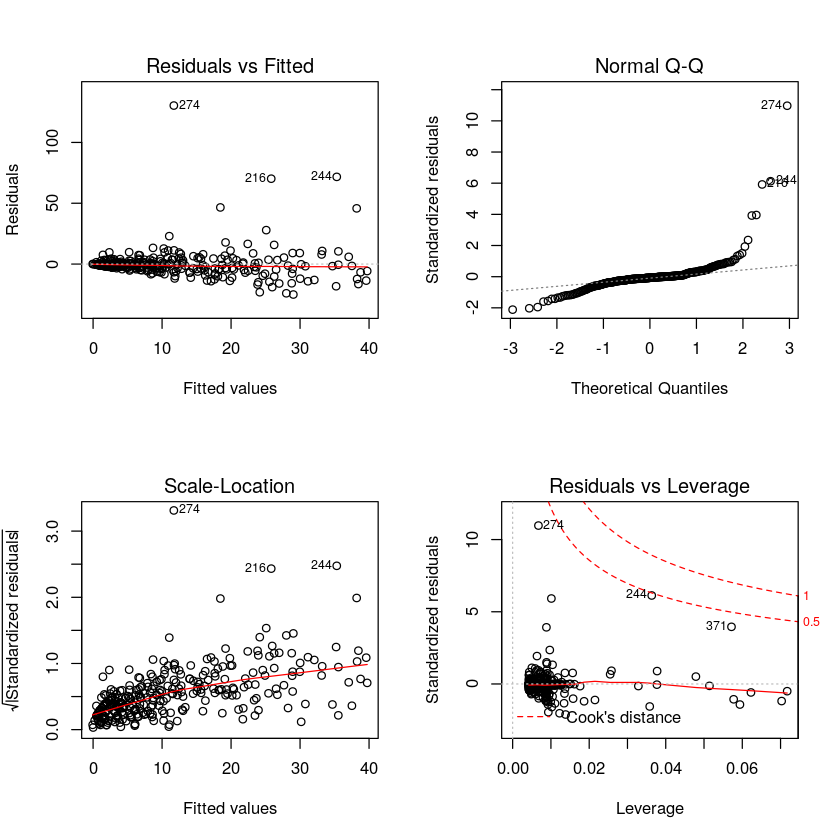

In [25]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=short_kotlin_projects)
par(mfrow=c(2,2))
plot(polynomial_fit)